# Question 2: Image Compression using PCA 

In [2]:
from PIL import Image
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

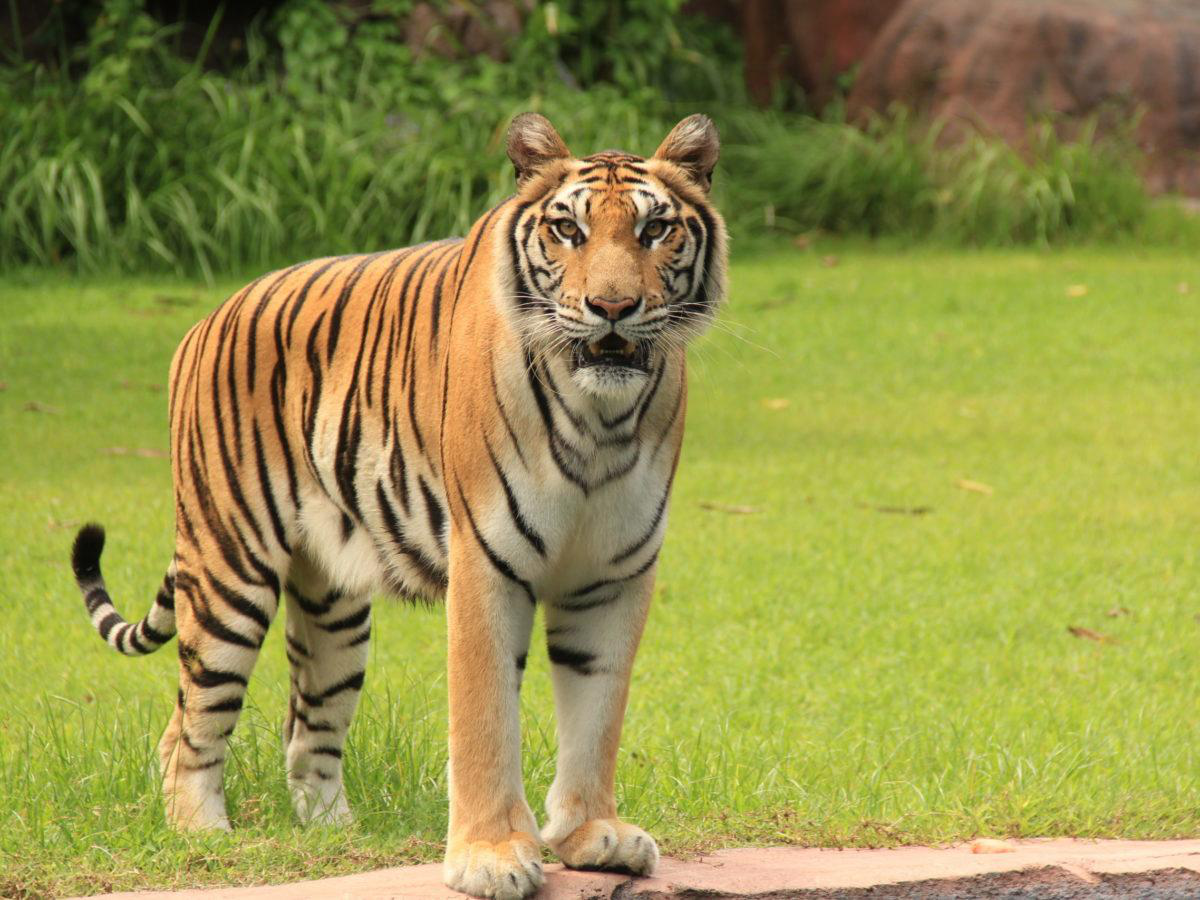

In [3]:
image = Image.open('tiger.jpg')
image

In [4]:
# Convert the image to a numpy array (RGB)
img_array = np.array(image)
img_array

array([[[ 20,  16,  15],
        [ 20,  16,  15],
        [ 18,  17,  13],
        ...,
        [138, 116, 103],
        [138, 116, 103],
        [138, 116, 103]],

       [[ 20,  16,  15],
        [ 19,  15,  14],
        [ 17,  16,  12],
        ...,
        [139, 117, 104],
        [139, 117, 104],
        [139, 117, 104]],

       [[ 19,  15,  14],
        [ 19,  15,  14],
        [ 17,  16,  12],
        ...,
        [140, 118, 105],
        [140, 118, 105],
        [140, 118, 105]],

       ...,

       [[186, 145,  91],
        [194, 154, 102],
        [193, 156, 104],
        ...,
        [121, 113, 111],
        [114, 109, 113],
        [107, 106, 111]],

       [[170, 131,  76],
        [177, 138,  83],
        [185, 148,  95],
        ...,
        [118, 110, 108],
        [113, 108, 112],
        [107, 106, 111]],

       [[186, 147,  90],
        [180, 144,  86],
        [180, 145,  89],
        ...,
        [140, 132, 130],
        [134, 129, 133],
        [124, 123, 128]]

In [5]:
img_array.shape

(900, 1200, 3)

In [6]:
# Store all the three matrices into separate variables
red = img_array[:, :, 0]
green = img_array[:, :, 1]
blue = img_array[:, :, 2]

In [7]:
red

array([[ 20,  20,  18, ..., 138, 138, 138],
       [ 20,  19,  17, ..., 139, 139, 139],
       [ 19,  19,  17, ..., 140, 140, 140],
       ...,
       [186, 194, 193, ..., 121, 114, 107],
       [170, 177, 185, ..., 118, 113, 107],
       [186, 180, 180, ..., 140, 134, 124]], dtype=uint8)

In [8]:
red.shape

(900, 1200)

In [9]:
# There are 900 rows with 1200 columns

In [10]:
# Now use PCA on all three matrices to compress the data. The reduced matrix
# can be obtained by dropping the columns corresponding to the smaller
# eigen-values

In [11]:
# Calculate covariance matrices
cov_red = np.cov(red.T)
cov_green = np.cov(green.T)
cov_blue = np.cov(blue.T)

In [12]:
# Get eigenvalues and eigenvectors
eigenvalues_red, eigenvectors_red = eig(cov_red)
eigenvalues_green, eigenvectors_green = eig(cov_green)
eigenvalues_blue, eigenvectors_blue = eig(cov_blue)

In [13]:
print(eigenvalues_red.shape)
print(eigenvectors_red.shape)

(1200,)
(1200, 1200)


In [14]:
# Sort eigenvalues and eigenvectors in descending order
idx_red = eigenvalues_red.argsort()[::-1]
eigenvalues_red = eigenvalues_red[idx_red]
eigenvectors_red = eigenvectors_red[:, idx_red]

idx_green = eigenvalues_green.argsort()[::-1]
eigenvalues_green = eigenvalues_green[idx_green]
eigenvectors_green = eigenvectors_green[:, idx_green]

idx_blue = eigenvalues_blue.argsort()[::-1]
eigenvalues_blue = eigenvalues_blue[idx_blue]
eigenvectors_blue = eigenvectors_blue[:, idx_blue]

In [15]:
#Just to test the approach, taking k as 50

k = 50 

eigenvectors_red_reduced = eigenvectors_red[:, :k]
eigenvectors_green_reduced = eigenvectors_green[:, :k]
eigenvectors_blue_reduced = eigenvectors_blue[:, :k]

# Project data onto reduced eigenvector space
projected_red = red @ eigenvectors_red_reduced
projected_green = green @ eigenvectors_green_reduced
projected_blue = blue @ eigenvectors_blue_reduced

# Reconstruct the compressed image channels
reconstructed_red = (projected_red @ eigenvectors_red_reduced.T).reshape(red.shape)
reconstructed_green = (projected_green @ eigenvectors_green_reduced.T).reshape(green.shape)
reconstructed_blue = (projected_blue @ eigenvectors_blue_reduced.T).reshape(blue.shape)

# Ensure values are in valid range (0-255)
reconstructed_red = np.clip(reconstructed_red, 0, 255)
reconstructed_green = np.clip(reconstructed_green, 0, 255)
reconstructed_blue = np.clip(reconstructed_blue, 0, 255)

# Convert back to uint8
reconstructed_red = reconstructed_red.astype(np.uint8)
reconstructed_green = reconstructed_green.astype(np.uint8)
reconstructed_blue = reconstructed_blue.astype(np.uint8)

/tmp/ipykernel_1691/2698842910.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_red = reconstructed_red.astype(np.uint8)
/tmp/ipykernel_1691/2698842910.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_green = reconstructed_green.astype(np.uint8)
/tmp/ipykernel_1691/2698842910.py:27: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_blue = reconstructed_blue.astype(np.uint8)


In [16]:
print(eigenvectors_red_reduced.shape)
print(projected_red.shape)
print(reconstructed_red.shape)

(1200, 50)
(900, 50)
(900, 1200)


In [17]:
compressed_image = np.stack([
    reconstructed_red,
    reconstructed_green,
    reconstructed_blue
], axis=2)

compressed_img = Image.fromarray(compressed_image)

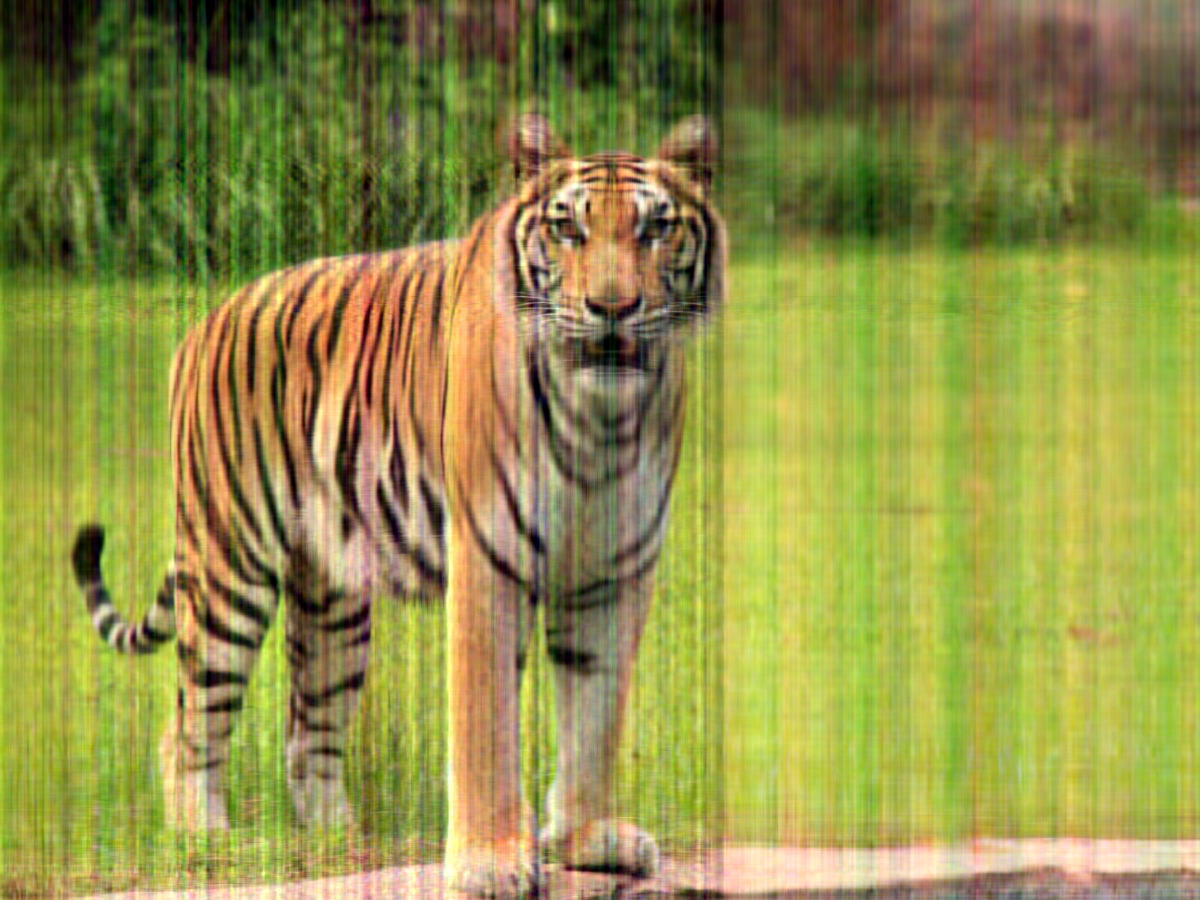

In [18]:
# Save the new image and note the size
compressed_img

In [19]:
# Choose k ∈ [3, 5, 10, 25, 50, 100,
# 150, 200, 250, 300, 350, p] where p is all the principal components

k_values = [3, 5, 10, 25, 50, 100, 150, 200, 250, 300, 350]
p = red.shape[0]
k_values.append(p)

# Initialize lists to store results
compression_ratios = []
variance_fractions_red = []
variance_fractions_green = []
variance_fractions_blue = []
image_sizes = []
original_size = red.size + green.size + blue.size

for k in k_values:
    # Reduce dimensionality
    eigenvectors_red_reduced = eigenvectors_red[:, :k]
    eigenvectors_green_reduced = eigenvectors_green[:, :k]
    eigenvectors_blue_reduced = eigenvectors_blue[:, :k]
    
    # Project data
    projected_red = red @ eigenvectors_red_reduced
    projected_green = green @ eigenvectors_green_reduced
    projected_blue = blue @ eigenvectors_blue_reduced
    
    # Calculate compressed size
    compressed_size = (projected_red.size + eigenvectors_red_reduced.size +
                      projected_green.size + eigenvectors_green_reduced.size +
                      projected_blue.size + eigenvectors_blue_reduced.size)

    print("K value: ", k, "compressed_size: ", compressed_size, "original_size: ", original_size)
        
    # Calculate compression ratio
    ratio =  compressed_size/original_size
    compression_ratios.append(ratio)
    
    # Calculate variance fractions
    var_red = np.sum(eigenvalues_red[:k]) / np.sum(eigenvalues_red)
    var_green = np.sum(eigenvalues_green[:k]) / np.sum(eigenvalues_green)
    var_blue = np.sum(eigenvalues_blue[:k]) / np.sum(eigenvalues_blue)
    
    variance_fractions_red.append(var_red)
    variance_fractions_green.append(var_green)
    variance_fractions_blue.append(var_blue)

K value:  3 compressed_size:  18900 original_size:  3240000
K value:  5 compressed_size:  31500 original_size:  3240000
K value:  10 compressed_size:  63000 original_size:  3240000
K value:  25 compressed_size:  157500 original_size:  3240000
K value:  50 compressed_size:  315000 original_size:  3240000
K value:  100 compressed_size:  630000 original_size:  3240000
K value:  150 compressed_size:  945000 original_size:  3240000
K value:  200 compressed_size:  1260000 original_size:  3240000
K value:  250 compressed_size:  1575000 original_size:  3240000
K value:  300 compressed_size:  1890000 original_size:  3240000
K value:  350 compressed_size:  2205000 original_size:  3240000
K value:  900 compressed_size:  5670000 original_size:  3240000


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


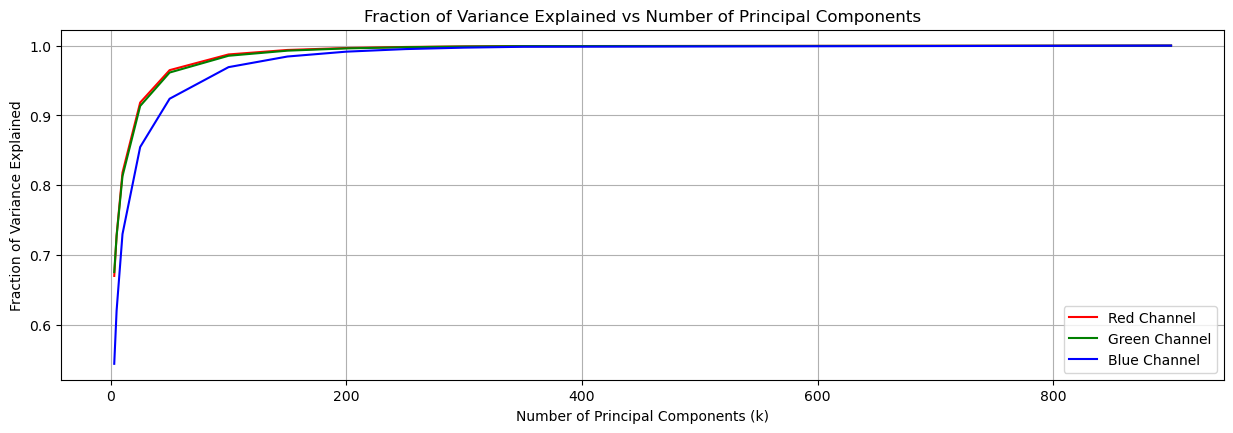

In [20]:
# Plot the fraction of variance as k increases
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(k_values, variance_fractions_red, 'r-', label='Red Channel')
plt.plot(k_values, variance_fractions_green, 'g-', label='Green Channel')
plt.plot(k_values, variance_fractions_blue, 'b-', label='Blue Channel')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Fraction of Variance Explained')
plt.title('Fraction of Variance Explained vs Number of Principal Components')
plt.legend()
plt.grid(True)

In [21]:
# Plot the compression ratio (size of the new image/ size of
# original image) as a function of k where k is the number of principal components
# used to construct the compressed image

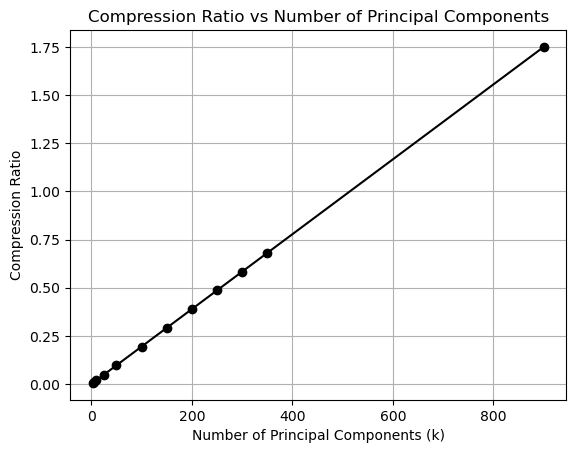

In [22]:
# Plot 2: Compression Ratio
plt.plot(k_values, compression_ratios, 'k-', marker='o')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Compression Ratio')
plt.title('Compression Ratio vs Number of Principal Components')
plt.grid(True)
plt.show()


In [23]:
print("\nDetailed Results:\n")
print("k\tVariance Fraction (R,G,B)\t\tCompression Ratio")
print("-" * 70)
for i, k in enumerate(k_values):
    print(f"{k}\t({variance_fractions_red[i]:.3f}, {variance_fractions_green[i]:.3f}, {variance_fractions_blue[i]:.3f})\t{compression_ratios[i]:.4f}")


Detailed Results:

k	Variance Fraction (R,G,B)		Compression Ratio
----------------------------------------------------------------------
3	(0.670-0.000j, 0.676-0.000j, 0.544-0.000j)	0.0058
5	(0.728-0.000j, 0.727-0.000j, 0.620-0.000j)	0.0097
10	(0.818-0.000j, 0.813-0.000j, 0.730-0.000j)	0.0194
25	(0.918-0.000j, 0.913-0.000j, 0.855-0.000j)	0.0486
50	(0.965-0.000j, 0.961-0.000j, 0.924-0.000j)	0.0972
100	(0.987-0.000j, 0.985-0.000j, 0.969-0.000j)	0.1944
150	(0.994-0.000j, 0.993-0.000j, 0.984-0.000j)	0.2917
200	(0.997-0.000j, 0.996-0.000j, 0.991-0.000j)	0.3889
250	(0.998-0.000j, 0.998-0.000j, 0.995-0.000j)	0.4861
300	(0.999-0.000j, 0.999-0.000j, 0.997-0.000j)	0.5833
350	(0.999-0.000j, 0.999-0.000j, 0.998-0.000j)	0.6806
900	(1.000-0.000j, 1.000-0.000j, 1.000-0.000j)	1.7500


In [24]:
# Approach 2
# Using PCA Package 

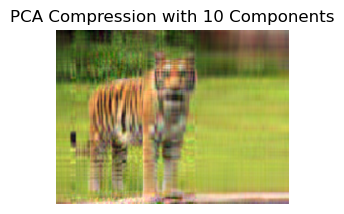

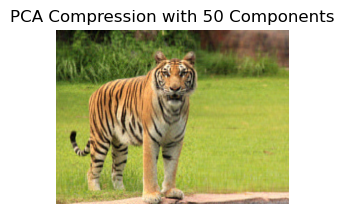

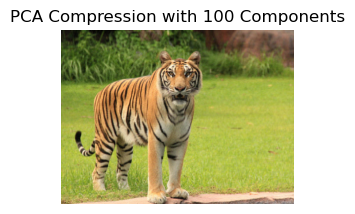

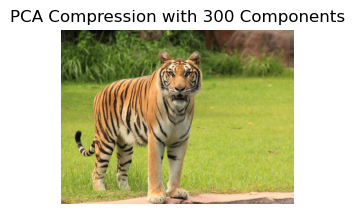

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imageio import imread

red = img_array[:, :, 0]
green = img_array[:, :, 1]
blue = img_array[:, :, 2]

def apply_pca(channel, k):
    
    h, w = channel.shape
    channel_reshaped = channel.reshape(h, w)  
    pca = PCA(n_components=k)
    transformed = pca.fit_transform(channel_reshaped)
    reconstructed = pca.inverse_transform(transformed)

    return reconstructed, pca.explained_variance_ratio_

k_values = [3, 5, 10, 25, 50, 100, 150, 200, 250, 300]
p = red.shape[0]
k_values.append(p)

for k in k_values:
    red_compressed, var_red = apply_pca(red, k)
    green_compressed, var_green = apply_pca(green, k)
    blue_compressed, var_blue = apply_pca(blue, k)
    
    compressed_img = np.stack([red_compressed, green_compressed, blue_compressed], axis=2)

    # Clip and convert to uint8
    compressed_img = np.clip(compressed_img, 0, 255).astype(np.uint8)

    # Display one of the compressed images
    if k in [10, 50, 100, 300]:  
        plt.figure(figsize=(3, 5))
        plt.imshow(compressed_img)
        plt.title(f"PCA Compression with {k} Components")
        plt.axis('off')
        plt.show()

# Question 3: Feed-Forward neural network 

In [27]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


x1 = 0
x2 = 1

w_h1_bias, w_h1_x1, w_h1_x2 = 2.5, 2, 1.5
w_h2_bias, w_h2_x1, w_h2_x2 = 1.5, -2, -1
w_y_bias, w_y_h1, w_y_h2 = -2, 2, 1

b_h = 1
b_y = 1

# Forward propagation

z_h1 = w_h1_bias * b_h + w_h1_x1 * x1 + w_h1_x2 * x2
h1 = sigmoid(z_h1)

z_h2 = w_h2_bias * b_h + w_h2_x1 * x1 + w_h2_x2 * x2
h2 = sigmoid(z_h2)

z_y = w_y_bias * b_y + w_y_h1 * h1 + w_y_h2 * h2
O = sigmoid(z_y)


In [28]:
# Calculate the output values at nodes h1, h2, and ŷ of this network for input 

print("Output value at node h1: ", round(h1, 3))
print("Output value at node h2: ", round(h2, 3))
print("Output value at node y: ", round(O, 3))

Output value at node h1:  0.982
Output value at node h2:  0.622
Output value at node y:  0.643


In [29]:
y_target = 1
error = 0.5 * (y_target - O) ** 2
error

0.06388215053115195

In [30]:
def sigmoid_derivative(z):
    return z * (1 - z)

In [31]:
# Backpropagation

# assume the learning rate is α=0.1
alpha = 0.1 

delta_y = (O - y_target) * sigmoid_derivative(O)
delta_h1 = delta_y * w_y_h1 * sigmoid_derivative(h1)
delta_h2 = delta_y * w_y_h2 * sigmoid_derivative(h2)


In [32]:
print(delta_h1)
print(delta_h2)
print(delta_y)

-0.0029000771766557834
-0.01929287884753416
-0.08209605995918927


In [33]:
# Update weights

# the three incoming weights to node h1
w_h1_bias = (w_h1_bias) - (alpha * delta_h1 * b_h)
w_h1_x1 = (w_h1_x1) - (alpha * delta_h1 * x1)
w_h1_x2 = (w_h1_x2) - (alpha * delta_h1 * x2)

# the three incoming weights to node h2
w_h2_bias = (w_h2_bias) - (alpha * delta_h2 * b_h)
w_h2_x1 = (w_h2_x1) - (alpha * delta_h2 * x1)
w_h2_x2 = (w_h2_x2) - (alpha * delta_h2 * x2)

# and the three incoming weights to node ŷ
w_y_bias = (w_y_bias) - (alpha * delta_y * b_y)
w_y_h1 = (w_y_h1) - (alpha * delta_y * h1)
w_y_h2 = (w_y_h2) - (alpha * delta_y * h2)

In [34]:

print("Updated Weights:")
print("w_h1_bias: ", round(w_h1_bias, 3), "w_h1_x1: ", round(w_h1_x1, 3), "w_h1_x2: ", round(w_h1_x2, 3))
print("w_h2_bias: ", round(w_h2_bias, 3), "w_h2_x1: ", round(w_h2_x1, 3), "w_h2_x2: ", round(w_h2_x2, 3))
print("w_y_bias: ", round(w_y_bias, 3), "w_y_h1: ", round(w_y_h1, 3), "w_y_h2: ", round(w_y_h2, 3))


Updated Weights:
w_h1_bias:  2.5 w_h1_x1:  2.0 w_h1_x2:  1.5
w_h2_bias:  1.502 w_h2_x1:  -2.0 w_h2_x2:  -0.998
w_y_bias:  -1.992 w_y_h1:  2.008 w_y_h2:  1.005
